In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

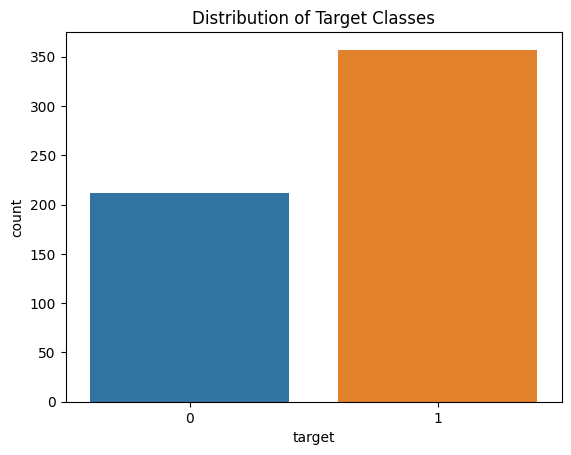

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display basic information about the dataset
print(df.info())

# Display descriptive statistics
print(df.describe())

# Visualize the distribution of target classes
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Classes')
plt.show()


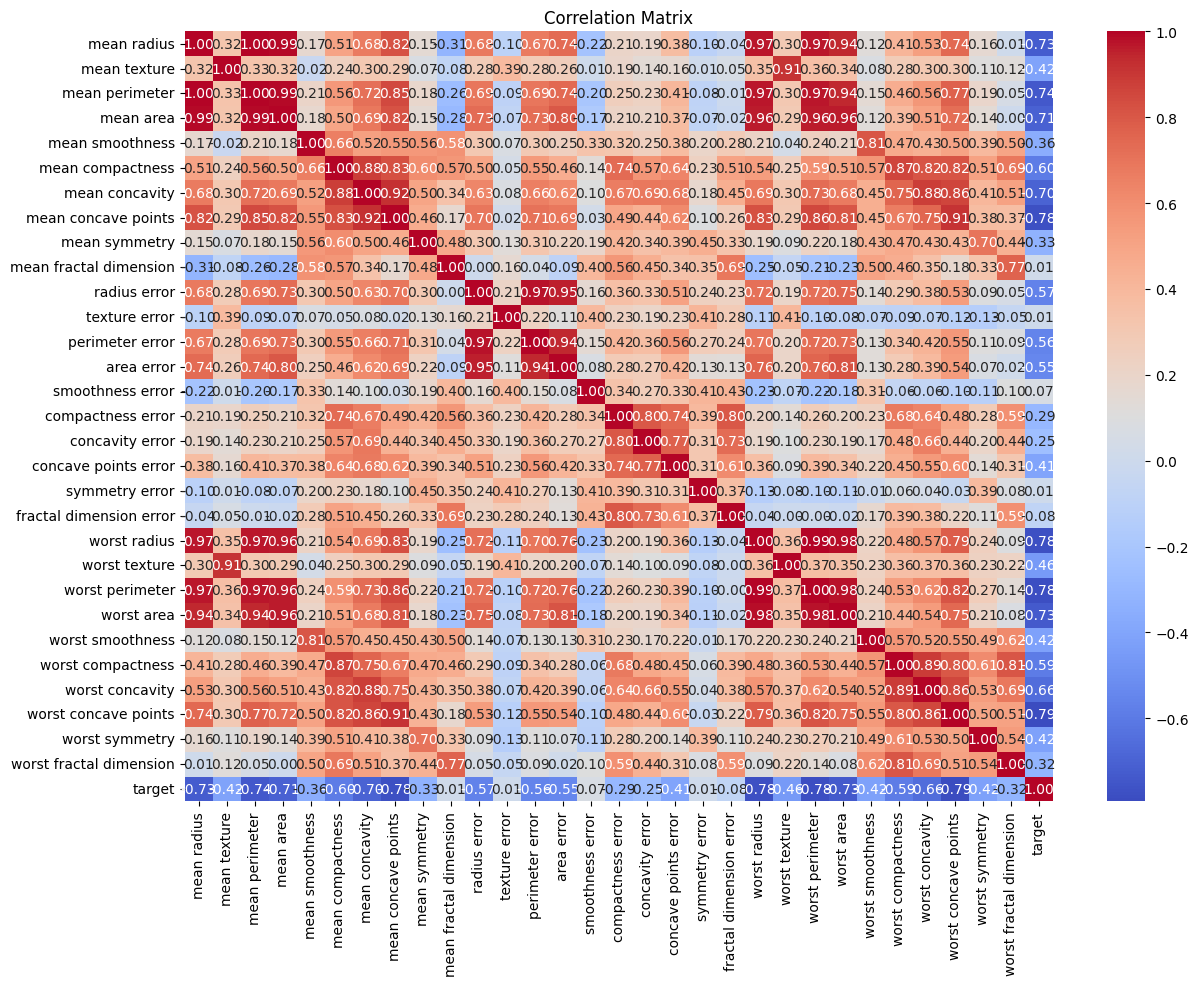

<Figure size 1400x600 with 0 Axes>

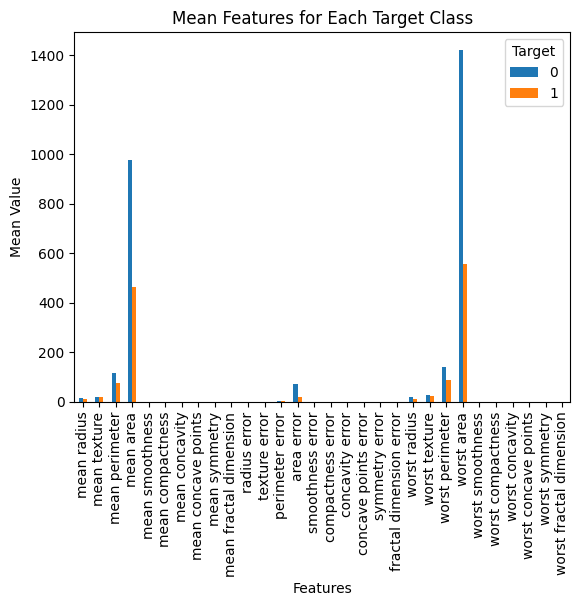

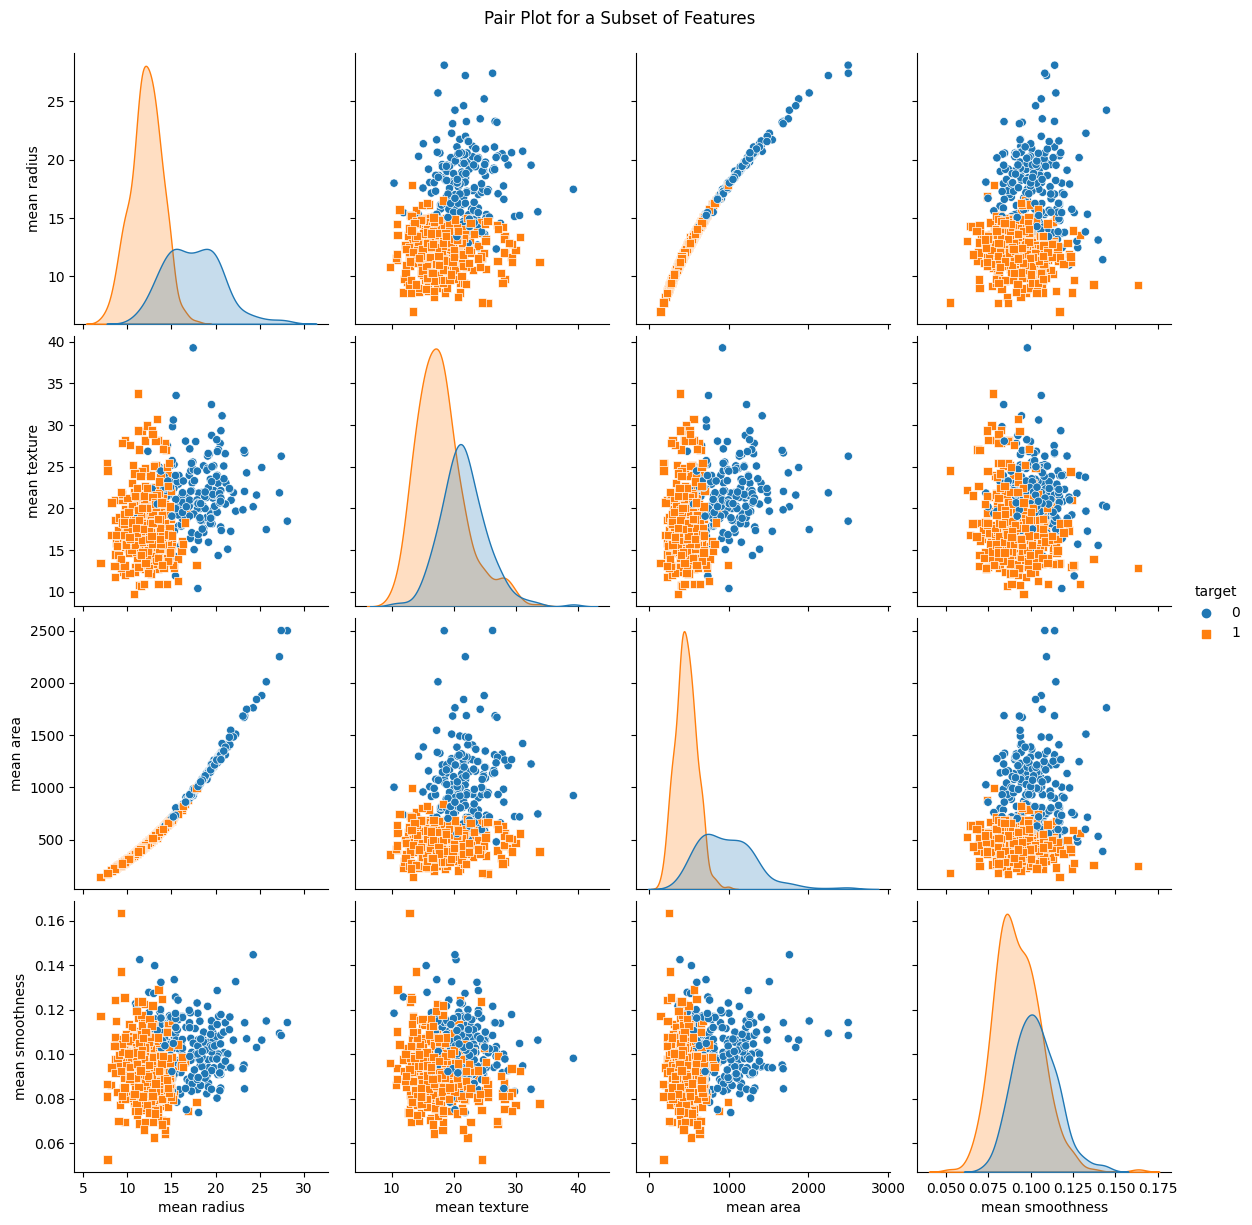

In [9]:
# Correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualize mean features for each target class
mean_features = df.groupby('target').mean()
mean_features = mean_features.transpose()

plt.figure(figsize=(14, 6))
mean_features.plot(kind='bar')
plt.title('Mean Features for Each Target Class')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Target', loc='upper right')
plt.show()

# Pair plot for a subset of features
subset_features = ['mean radius', 'mean texture', 'mean area', 'mean smoothness', 'target']
sns.pairplot(df[subset_features], hue='target', markers=['o', 's'], height=3)
plt.suptitle('Pair Plot for a Subset of Features', y=1.02)
plt.show()



In [10]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['target'] = y
print(df_scaled.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their respective hyperparameters for tuning
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
    'Support Vector Machine': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})
}

# Hyperparameter tuning and model selection
best_models = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy for {model_name} on training set: {grid_search.best_score_:.4f}\n")

# Model Evaluation on the test set
test_accuracies = {}
for model_name, model in best_models.items():
    test_accuracy = model.score(X_test, y_test)
    test_accuracies[model_name] = test_accuracy

    print(f"Accuracy for {model_name} on test set: {test_accuracy:.4f}")

# Model Selection - Choosing the model with the highest accuracy on the test set
best_model_name = max(test_accuracies, key=test_accuracies.get)
best_model = best_models[best_model_name]

print(f"\nThe best model on the test set is: {best_model_name}")


c:\Software\Anaconda\envs\benv\lib\site-packages\scikit_learn-0.24.2-py3.8-win-amd64.egg\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Software\Anaconda\envs\benv\lib\site-packages\scikit_learn-0.24.2-py3.8-win-amd64.egg\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

Best hyperparameters for Logistic Regression: {'C': 100}
Best accuracy for Logistic Regression on training set: 0.9495

Best hyperparameters for Decision Tree: {'max_depth': 30}
Best accuracy for Decision Tree on training set: 0.9209

Best hyperparameters for Random Forest: {'n_estimators': 50}
Best accuracy for Random Forest on training set: 0.9626

Best hyperparameters for Support Vector Machine: {'C': 1, 'kernel': 'linear'}
Best accuracy for Support Vector Machine on training set: 0.9560

Accuracy for Logistic Regression on test set: 0.9561
Accuracy for Decision Tree on test set: 0.9298
Accuracy for Random Forest on test set: 0.9649
Accuracy for Support Vector Machine on test set: 0.9561

The best model on the test set is: Random Forest


In [13]:
import joblib

# Save the best model
best_model_filename = 'best_model.joblib'
joblib.dump(best_model, best_model_filename)

print(f"The best model ({best_model_name}) is saved to {best_model_filename}")


The best model (Random Forest) is saved to best_model.joblib


In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load Breast Cancer dataset
data = load_breast_cancer()

# Create a DataFrame from the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
df['target'] = data.target

# Save the DataFrame as a CSV file
csv_file_path = "breast_cancer_data.csv"
df.to_csv(csv_file_path, index=False)

print(f"Breast Cancer dataset saved as CSV: {csv_file_path}")


Breast Cancer dataset saved as CSV: breast_cancer_data.csv


: 